In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
white_path = "wine-white.csv"
red_path = "wine-red.csv"

def import_merge_df(file_name1, file_name2):
    df1 = pd.read_csv(file_name1)
    df2 = pd.read_csv(file_name2)
    print(df1.shape)
    print(df2.shape)
    # merge the dataframes 
    df = pd.concat([df1, df2], ignore_index=True)
    return df


df = import_merge_df(red_path, white_path)
df

(1599, 12)
(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### Setup data

Tested a few seeds to find one where the quality median and mean was similar in the training set and testing set. The median did not give us any meaningful insight into the seed. The range of quality values was small so all of the seeds ended up having the same median. We ended up using the mean to determine which seed we should use.  

In [22]:
# generate features and labels
features = df.drop('quality', 1)
labels = df['quality']
# The median didn't tell us much about the data set, labels are pretty narrow. 
print(labels.name+ ' median')
print(labels.median())


# reported and reviewed the mean as well
print(labels.name+ ' mean')
print(labels.mean())

# optimize seeds so the test and train data has similar mean quality
def test_seeds():
    test_prop = 0.25
#     seed = 23
    seeds = range(3000, 3010)
    for seed in seeds:
        X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        test_size = test_prop, random_state = seed)
        
        # change this to median
        print(seed)
        print('train median: %d , test median: %d , train mean: %f , test mean: %f ' 
              % (y_train.median(), y_test.median(), y_train.mean(), y_test.mean()))

        
test_seeds()

quality median
6.0
quality mean
5.818377712790519
3000
train median: 6 , test median: 6 , train mean: 5.825123 , test mean: 5.798154 
3001
train median: 6 , test median: 6 , train mean: 5.818350 , test mean: 5.818462 
3002
train median: 6 , test median: 6 , train mean: 5.817118 , test mean: 5.822154 
3003
train median: 6 , test median: 6 , train mean: 5.821223 , test mean: 5.809846 
3004
train median: 6 , test median: 6 , train mean: 5.817529 , test mean: 5.820923 
3005
train median: 6 , test median: 6 , train mean: 5.814450 , test mean: 5.830154 
3006
train median: 6 , test median: 6 , train mean: 5.821839 , test mean: 5.808000 
3007
train median: 6 , test median: 6 , train mean: 5.824507 , test mean: 5.800000 
3008
train median: 6 , test median: 6 , train mean: 5.829844 , test mean: 5.784000 
3009
train median: 6 , test median: 6 , train mean: 5.812192 , test mean: 5.836923 


In [23]:
# use 3001 as the seed

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, 
                                                    random_state = 3001)

alphas = np.arange(0.0,10.1,0.1)
print(alphas)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


## Finding ideal number of components and applying PCA

,explained variance
0,0.000000
1,0.726701
2,0.944201
3,0.972817
4,0.988385
5,0.998697
6,0.999593
7,0.999811
8,0.999924
9,0.999987


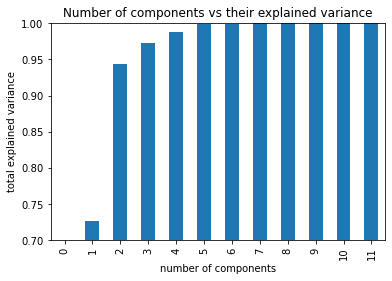

In [24]:
from sklearn.model_selection import train_test_split

#scale data first
features_norm = normalize(features)
#fixed seed for comparing different n_component numbers
seed = 5026
pca_X_train, pca_X_test = train_test_split(features_norm, test_size=0.25, random_state=seed)

variance={'explained variance':[]}

for k in range(0,12):
    pca = PCA(n_components=k).fit(x_train)
    variance['explained variance'].append(pca.explained_variance_ratio_.sum())

df = pd.DataFrame(variance)

ax = df.plot.bar(ylim=(0.70,1.001),title="Number of components vs their explained variance")
ax.set_xlabel("number of components")
ax.set_ylabel("total explained variance")
ax.get_legend().remove()

df

The graph above shows different components and their explained variances. There is no way to get 100% explained variation, however it is possible to get close. In `Jake VanderPlas`'s `Python Data Science Handbook` he states that having anywhere over 90% of the total variance explained is good enough to model the dataset. In our case all of the explained variances for components higher than or equal to 2 have sufficient explained variance. Since we are trying to reduce the number of componenets as far as possible, we chose 2 as the number of components to use.

In [25]:
pca = PCA(n_components=2)
pca.fit(pca_X_train)
pca_X_train = pca.transform(pca_X_train)
pca_X_test = pca.transform(pca_X_test)

### Now we will use various regression models and alpha parameters to determine which is the most effective.
- We will evaluate each model using scaled and non scaled data to compare the results. 

## Linear Regression

In [26]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: %f" % lr.score(X_train, y_train))
print("Testing set score: %f" % lr.score(X_test, y_test))
lr_score_train = lr.score(X_train, y_train)
lr_score_test = lr.score(X_test, y_test)
print(lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.2977184292827676


##  Linear Regression Scaled

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sc_lr = LinearRegression().fit(X_train_scaled, y_train)
print("Training set score: %f" % sc_lr.score(X_train_scaled, y_train))
print("Testing set score: %f" % sc_lr.score(X_test_scaled, y_test))
sc_lr_score_train = sc_lr.score(X_train_scaled, y_train)
sc_lr_score_test = sc_lr.score(X_test_scaled, y_test)
print(sc_lr_score_train)

Training set score: 0.297718
Testing set score: 0.273965
0.29771842928276804


##  Linear Regression (PCA)

In [33]:
lr_pca = LinearRegression().fit(pca_X_train, y_train)
print("Training set score with PCA: %f" % lr_pca.score(pca_X_train, y_train))
print("Testing set score with PCA : %f" % lr_pca.score(pca_X_test, y_test))
pca_lr_score_train = lr_pca.score(pca_X_train, y_train)
pca_lr_score_test = lr_pca.score(pca_X_test, y_test)
print(pca_lr_score_train)

Training set score with PCA: 0.000118
Testing set score with PCA : -0.000035
0.000118372208237294


### Results
- We saw no difference between linear regression models with the scaled data or the original data. The data with reduced dimensions from pca performed Very Poorly compared to the other linear regression models.

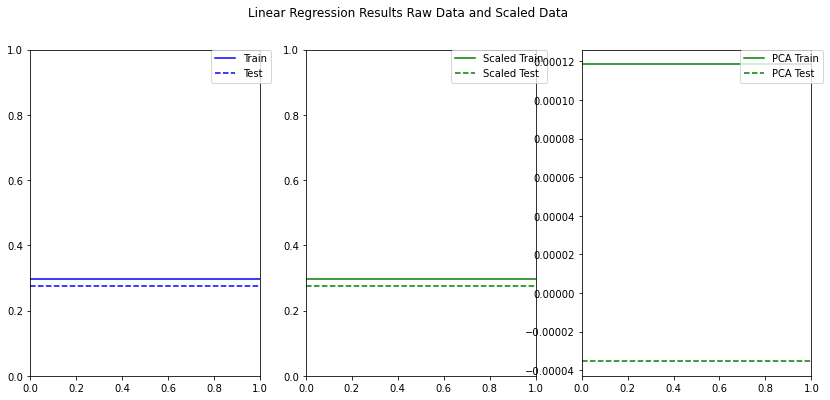

In [39]:
# figure of scaled and non scaled
def plot_lr_data(d1,d2,d3,d4,d5,d6):
    
    f, ax = plt.subplots(1, 1, figsize = (14,6))
    
    plt.subplot(131)
    plt.axhline(d1, c='b', linestyle='-', label= 'Train')
    plt.axhline(d2, c='b', linestyle='--', label= 'Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    plt.suptitle("Linear Regression Results Raw Data and Scaled Data")
    
    plt.subplot(132)
    plt.axhline(d3, c='g', linestyle='-', label= 'Scaled Train')
    plt.axhline(d4, c='g', linestyle='--', label= 'Scaled Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)
    
    plt.subplot(133)
    plt.axhline(d5, c='g', linestyle='-', label= 'PCA Train')
    plt.axhline(d6, c='g', linestyle='--', label= 'PCA Test')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0.)

    plt.show()
    
plot_lr_data(lr_score_train, lr_score_test, sc_lr_score_train, sc_lr_score_test,pca_lr_score_train,pca_lr_score_test)


### Next we will use different regression models and iterate through alpha parameters to find the best result. 
- The alpha parameters are used to help avoid overfitting the data to the training set. This should help improve the accuracy on the testing set. 

## Ridge and Ridge with Scaled Data

In [41]:
ridge_tr_score = list()
ridge_tst_score = list()
sc_ridge_tr_score = list()
sc_ridge_tst_score = list()

ridge_pca_tr_score = list()
ridge_pca_tst_score = list()
for alpha in alphas:
    print('alpha: %.2f' %alpha)
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    print("Training set score: %f" % ridge.score(X_train, y_train))
    ridge_tr_score.append(ridge.score(X_train, y_train))
    print("Testing set score: %f" % ridge.score(X_test, y_test))
    ridge_tst_score.append(ridge.score(X_test, y_test))
    
    ridge = Ridge(alpha = alpha).fit(X_train_scaled, y_train)
    print("Scaled training set score: %f" % ridge.score(X_train_scaled, y_train))
    sc_ridge_tr_score.append(ridge.score(X_train_scaled, y_train))
    print("Scaled testing set score: %f" % ridge.score(X_test_scaled, y_test))
    sc_ridge_tst_score.append(ridge.score(X_test_scaled, y_test))

    ridge = Ridge(alpha = alpha).fit(pca_X_train, y_train)
    print("Training set score with PCA: %f" % ridge.score(pca_X_train, y_train))
    ridge_pca_tr_score.append(ridge.score(pca_X_train, y_train))
    print("Testing set score with PCA: %f" % ridge.score(pca_X_test, y_test))
    ridge_pca_tst_score.append(ridge.score(pca_X_test, y_test))

   
print('The best result for Ridge was: %.4f' % max(ridge_tst_score))

alpha: 0.00
Training set score: 0.297718
Testing set score: 0.273965
Scaled training set score: 0.297718
Scaled testing set score: 0.273965
Training set score with PCA: 0.000118
Testing set score with PCA: -0.000035
alpha: 0.10
Training set score: 0.295254
Testing set score: 0.272793
Scaled training set score: 0.297678
Scaled testing set score: 0.273980
Training set score with PCA: 0.000118
Testing set score with PCA: -0.000035
alpha: 0.20
Training set score: 0.295183
Testing set score: 0.272747
Scaled training set score: 0.297586
Scaled testing set score: 0.273932
Training set score with PCA: 0.000118
Testing set score with PCA: -0.000035
alpha: 0.30
Training set score: 0.295157
Testing set score: 0.272728
Scaled training set score: 0.297472
Scaled testing set score: 0.273849
Training set score with PCA: 0.000118
Testing set score with PCA: -0.000034
alpha: 0.40
Training set score: 0.295141
Testing set score: 0.272716
Scaled training set score: 0.297350
Scaled testing set score: 0.273

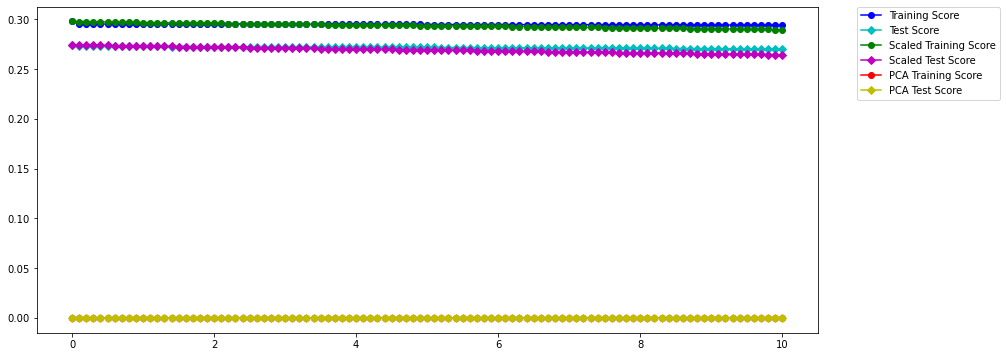

In [46]:
# plot the scaled and non scaled

def plot_lr_alphas(d1,d2,d3,d4,d5,d6,labels):
    f, ax = plt.subplots(1, 1, figsize = (14,6))
    plt.plot(labels, d1, 'b', marker='o', label='Training Score')
    plt.plot(labels, d2, 'c', marker='D', label='Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Scaled Training Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Test Score')
    plt.plot(labels, d5, 'r', marker='o', label='PCA Training Score')
    plt.plot(labels, d6, 'y', marker='D', label='PCA Test Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

plot_lr_alphas(ridge_tr_score, ridge_tst_score, sc_ridge_tr_score, sc_ridge_tst_score,ridge_pca_tr_score,ridge_pca_tst_score,alphas)

### Results
- With ridge regularization the scaled test scores performed better with alpha values below 1.8. After that point the model with the reaw feature data performed better. 
- We also saw that as the training accuracy went down so did the testing accuracy. This indicates that overfitting was not really a problem. Our models low performance score is more so based on how well these features can be used to predict the wine quality. 

## Lasso and Lasso with Scaled Data
- We printed out the number of coefficients to see how many were set to zero with L1 regularization

In [44]:
lasso_tr_score = list()
lasso_tst_score = list()
sc_lasso_tr_score = list()
sc_lasso_tst_score = list()

lasso_PCA_tr_score = list()
lasso_PCA_tst_score = list()
for alpha in alphas:
    print(alpha)
    lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train, y_train)
    print("Training set score: %f" % lasso.score(X_train, y_train))
    lasso_tr_score.append(lasso.score(X_train, y_train))
    print("Testing set score: %f" % lasso.score(X_test, y_test))
    lasso_tst_score.append(lasso.score(X_test, y_test))
        
    print("Number of features: %d" % np.sum(lasso.coef_ != 0))
    
    sc_lasso = Lasso(alpha = alpha, max_iter = 100000).fit(X_train_scaled, y_train)
    print("Scaled training set score: %f" % sc_lasso.score(X_train_scaled, y_train))
    sc_lasso_tr_score.append(sc_lasso.score(X_train_scaled, y_train))
    print("Scaled testing set score: %f" % sc_lasso.score(X_test_scaled, y_test))
    sc_lasso_tst_score.append(sc_lasso.score(X_test_scaled, y_test))
    
    print("Number of features: %d" % np.sum(sc_lasso.coef_ != 0))

    lasso_pca = Lasso(alpha = alpha, max_iter = 100000).fit(pca_X_train, y_train)
    print("Training set score with PCA: %f" % lasso_pca.score(pca_X_train, y_train))
    lasso_PCA_tr_score.append(lasso_pca.score(pca_X_train, y_train))
    print("Testing set score with PCA: %f" % lasso_pca.score(pca_X_test, y_test))
    lasso_PCA_tst_score.append(lasso_pca.score(pca_X_test, y_test))
    print("Number of features: %d" % np.sum(lasso_pca.coef_ != 0))
    
    
print(max(lasso_tst_score))

0.0
Training set score: 0.297718
Testing set score: 0.273965
Number of features: 11
Scaled training set score: 0.297718
Scaled testing set score: 0.273965
Number of features: 11
Training set score with PCA: 0.000118
Testing set score with PCA: -0.000035
Number of features: 2
0.1
Training set score: 0.223449
Testing set score: 0.188475
Number of features: 4
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0
Training set score with PCA: 0.000000
Testing set score with PCA: -0.000000
Number of features: 0
0.2
Training set score: 0.187850
Testing set score: 0.160419
Number of features: 3
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Number of features: 0
Training set score with PCA: 0.000000
Testing set score with PCA: -0.000000
Number of features: 0
0.30000000000000004
Training set score: 0.137403
Testing set score: 0.119373
Number of features: 3
Scaled training set score: 0.000000
Scaled testing set score: -0.000000
Num

### Alpha results
- Anything with and alpha higher than 1 gave us very poor results and as soon as the alpha was 1.2 or greater zero features were used so this is obviously not a good result. 
- We will exclude these scores and place them below. 

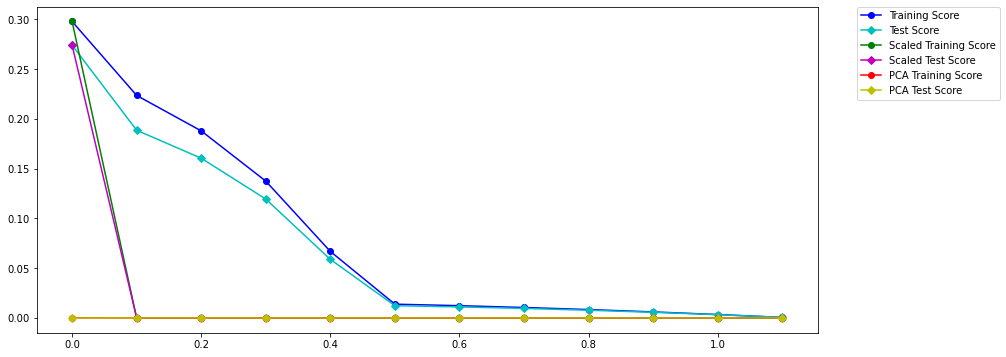

In [47]:

plot_lr_alphas(lasso_tr_score[:12], lasso_tst_score[:12], sc_lasso_tr_score[:12],
               sc_lasso_tst_score[:12],lasso_PCA_tr_score[:12] alphas[:12])

### Lasso Result discussion

### Visulaizations of the data, need to show the results for all 3 with and with out scaled data. 

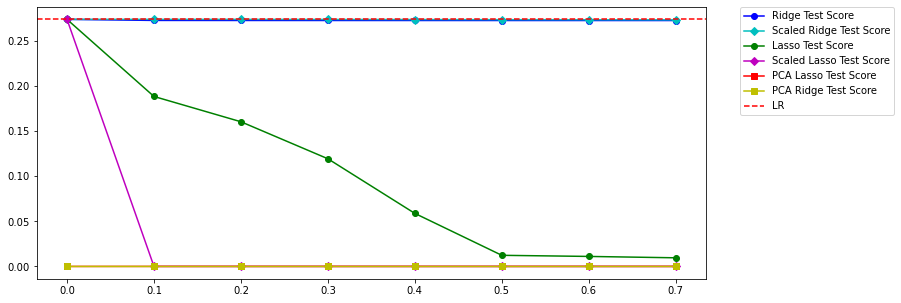

In [52]:
# print testing data for alphas up to 0.6
def plot_testing(d1,d2,d3,d4,d5,d6,d7,labels):
    f, ax = plt.subplots(1, 1, figsize = (12,5))
    plt.plot(labels, d1, 'b', marker='o', label='Ridge Test Score')
    plt.plot(labels, d2, 'c', marker='D', label='Scaled Ridge Test Score')
    plt.plot(labels, d3, 'g', marker='o', label='Lasso Test Score')
    plt.plot(labels, d4, 'm', marker='D', label='Scaled Lasso Test Score')
    plt.plot(labels, d6, 'r', marker='s', label='PCA Lasso Test Score')
    plt.plot(labels, d7, 'y', marker='s', label='PCA Ridge Test Score')
    
    plt.axhline(d5, c='r', linestyle='--', label= 'LR')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    
plot_testing(ridge_tst_score[:8], sc_ridge_tst_score[:8], lasso_tst_score[:8], 
             sc_lasso_tst_score[:8], lr_score_test,lasso_PCA_tst_score[:8], ridge_pca_tst_score[:8], alphas[:8] )

### Discussion of what worked better to answer the question. 